# Employee Absenteeism

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from graphviz import Source

In [7]:
# Reading data
emp_data = pd.read_excel("Absenteeism_at_work_Project.xls")
emp_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [11]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null float64
Month of absence                   739 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null float64
Education                          730 non-null float64
Son                                734 non-null float64
Social drinker                     737 non-null float64
Social smoker                      736 non-null float64
Pet  

In [12]:
emp_data.shape

(740, 21)

In [13]:
# Changing the names of the columns
emp_data.columns  = ['Id', 'Reason', 'Month', 'DOW', 'Season', 'Trans_exp', 'Distance', 'Service_time',
                     'Age', 'Avg_work_load', 'Hit_target', 'Disciplinary', 'Education', 'Children', 'Drink',
                     'Smoke', 'No_of_pet', 'Weight', 'Hieght', 'BMI', 'Hours_absent']

In [14]:
emp_data.head()

,Id,Reason,Month,DOW,Season,Trans_exp,Distance,Service_time,Age,Avg_work_load,...,Disciplinary,Education,Children,Drink,Smoke,No_of_pet,Weight,Hieght,BMI,Hours_absent
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


## Pre - processing 
### Missing Value Analysis

In [6]:
# Calculating missing percentage in the data
dict0 = {}
for i in emp_data.isna():
    dict0[i] = [i, (sum(emp_data.isna()[i]) * 100 / len(emp_data.Id))]
mv = pd.DataFrame(data = dict0)
mv = mv.drop([0])
mv = mv.T
mv.columns = ['Missing Values Percentage']
mv.sort_values(by='Missing Values Percentage', ascending=False)

,Missing Values Percentage
BMI,4.18919
Hours_absent,2.97297
Hieght,1.89189
Education,1.35135
Avg_work_load,1.35135
Trans_exp,0.945946
Hit_target,0.810811
Children,0.810811
Disciplinary,0.810811
Smoke,0.540541


In [7]:
# Imputing the columns with missing values with mean or median
emp_data.Trans_exp = emp_data.Trans_exp.fillna(np.nanmean(emp_data.Trans_exp))
emp_data.Education = emp_data.Education.fillna(np.nanmedian(emp_data.Education))
emp_data.Disciplinary = emp_data.Disciplinary.fillna(np.nanmedian(emp_data.Disciplinary))
emp_data.Drink = emp_data.Drink.fillna(np.nanmedian(emp_data.Drink))
emp_data.Smoke = emp_data.Smoke.fillna(np.nanmedian(emp_data.Smoke))
emp_data.Age = emp_data.Age.fillna(np.nanmean(emp_data.Age))
emp_data.No_of_pet = emp_data.No_of_pet.fillna(np.nanmedian(emp_data.No_of_pet))
emp_data.Hours_absent = emp_data.Hours_absent.fillna(np.nanmedian(emp_data.Hours_absent))
emp_data.Distance = emp_data.Distance.fillna(np.nanmean(emp_data.Distance))
emp_data.Service_time = emp_data.Service_time.fillna(np.nanmean(emp_data.Service_time))
emp_data.Avg_work_load = emp_data.Avg_work_load.fillna(np.nanmean(emp_data.Avg_work_load))
emp_data.Reason = emp_data.Reason.fillna(np.nanmedian(emp_data.Reason))
emp_data.Hit_target = emp_data.Hit_target.fillna(np.nanmedian(emp_data.Hit_target))
emp_data.Month = emp_data.Month.fillna(np.nanmedian(emp_data.Month))
emp_data.Children = emp_data.Children.fillna(np.nanmedian(emp_data.Children))
emp_data.Weight = emp_data.Weight.fillna(np.nanmean(emp_data.Weight))
emp_data.Hieght = emp_data.Hieght.fillna(np.nanmean(emp_data.Hieght))

In [8]:
# Calculating BMI from the given weights and hieghts
for i in range(emp_data.BMI.shape[0]):
    if np.isnan(emp_data.BMI[i]):
        emp_data.BMI[i] = emp_data.Weight[i] * 10000  /(emp_data.Hieght[i] ** 2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
emp_data.count()

Id               740
Reason           740
Month            740
DOW              740
Season           740
Trans_exp        740
Distance         740
Service_time     740
Age              740
Avg_work_load    740
Hit_target       740
Disciplinary     740
Education        740
Children         740
Drink            740
Smoke            740
No_of_pet        740
Weight           740
Hieght           740
BMI              740
Hours_absent     740
dtype: int64

### Chi-squared Test for categorical features.

In [10]:
names = ['Reason', 'Month', 'DOW', 'Season', 'Hit_target', 'Disciplinary', 'Education', 'Drink', 'Smoke']
for i in names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(emp_data['Hours_absent'], emp_data[i]))
    print(p)

Reason
7.262525646531397e-126
Month
2.5138924624334413e-08
DOW
0.003021081110471532
Season
1.0699164671285167e-06
Hit_target
0.0011492200973353258
Disciplinary
2.811327292697691e-103
Education
0.966890372726654
Drink
0.0023832329972678858
Smoke
0.5104529781136267


### Correlation for numerical features.

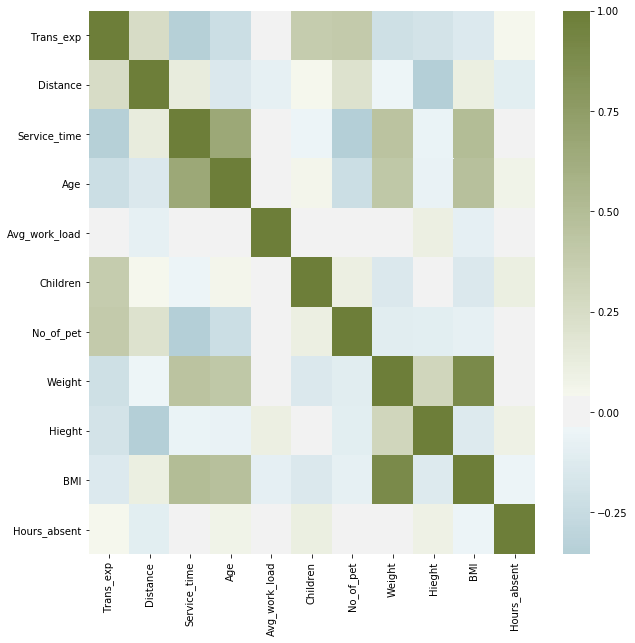

In [11]:
numerical = [i for i in emp_data if i not in names and i != 'Id']
Correlation = emp_data.loc[:,numerical].corr()    

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(Correlation, mask=np.zeros_like(Correlation,dtype=np.bool), 
            cmap=sns.diverging_palette(220,100, as_cmap=True), 
            square=False, ax = ax, center=0, robust=True);

### Outlier Analysis

count    740.000000
mean       6.859459
std       13.292045
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Hours_absent, dtype: float64

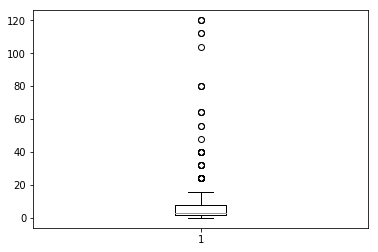

In [12]:
plt.boxplot(emp_data.Hours_absent);
emp_data.Hours_absent.describe()

In [13]:
q_3, q_1 = np.percentile(emp_data.Hours_absent, [75,25])
iqr = q_3 - q_1
minimum, maximum = np.percentile(emp_data.Hours_absent, 0), q_3 + (iqr * 1.5)

emp_data = emp_data.drop(emp_data[emp_data.Hours_absent > maximum].index)

count    697.000000
mean       4.263989
std        3.391891
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max       16.000000
Name: Hours_absent, dtype: float64

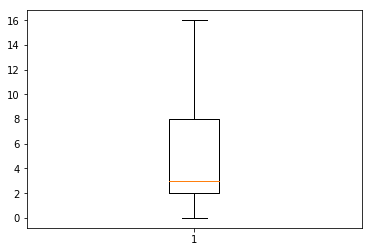

In [14]:
plt.boxplot(emp_data.Hours_absent);
emp_data.Hours_absent.describe()

In [15]:
dict_normal = {}
for i in numerical:
    dict_normal[i] = [max(emp_data[i]), min(emp_data[i])]
    emp_data[i] = ((emp_data[i] - min(emp_data[i]))/(max(emp_data[i]) - min(emp_data[i])))

In [16]:
dict_normal

{'Age': [58.0, 27.0],
 'Avg_work_load': [378884.0, 205917.0],
 'BMI': [38.0, 19.0],
 'Children': [4.0, 0.0],
 'Distance': [52.0, 5.0],
 'Hieght': [196.0, 163.0],
 'Hours_absent': [16.0, 0.0],
 'No_of_pet': [8.0, 0.0],
 'Service_time': [29.0, 1.0],
 'Trans_exp': [388.0, 118.0],
 'Weight': [108.0, 56.0]}

In [17]:
emp_data['Category_absent'] = pd.cut(emp_data.Hours_absent,  bins=4,labels= ['least', 'moderate', 'high', 'highest'])

In [18]:
emp_data = emp_data.drop(['Distance', 'No_of_pet', 'Weight', 'Hieght', 'BMI', 'Hours_absent'], axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(emp_data.iloc[:, 0:15], emp_data.iloc[:,15], test_size = 0.1)
C50_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
C50_model.fit(X_train, y_train)

predictions = C50_model.predict(X_test)

nn = C50_model.decision_path(X_test)
for i in [0,1,2,3]:
    print(nn.indices[nn.indptr[i] : nn.indptr[i+1]])

[0 1 3 4 5 6]
[ 0 18 32 33 37]
[ 0 18 19 20 21 23]
[ 0 18 32 33 34 35]


In [69]:
score = C50_model.score(test.iloc[:,0:15], test.iloc[:,15])
score

0.8571428571428571

In [70]:
dot_file = open('ptdot', 'w')
ddd = tree.export_graphviz(C50_model, out_file=dot_file, feature_names=emp_data.columns[0:15], 
                     class_names=emp_data.columns[15], filled=True, leaves_parallel=True, rounded= True, 
                     special_characters=True)

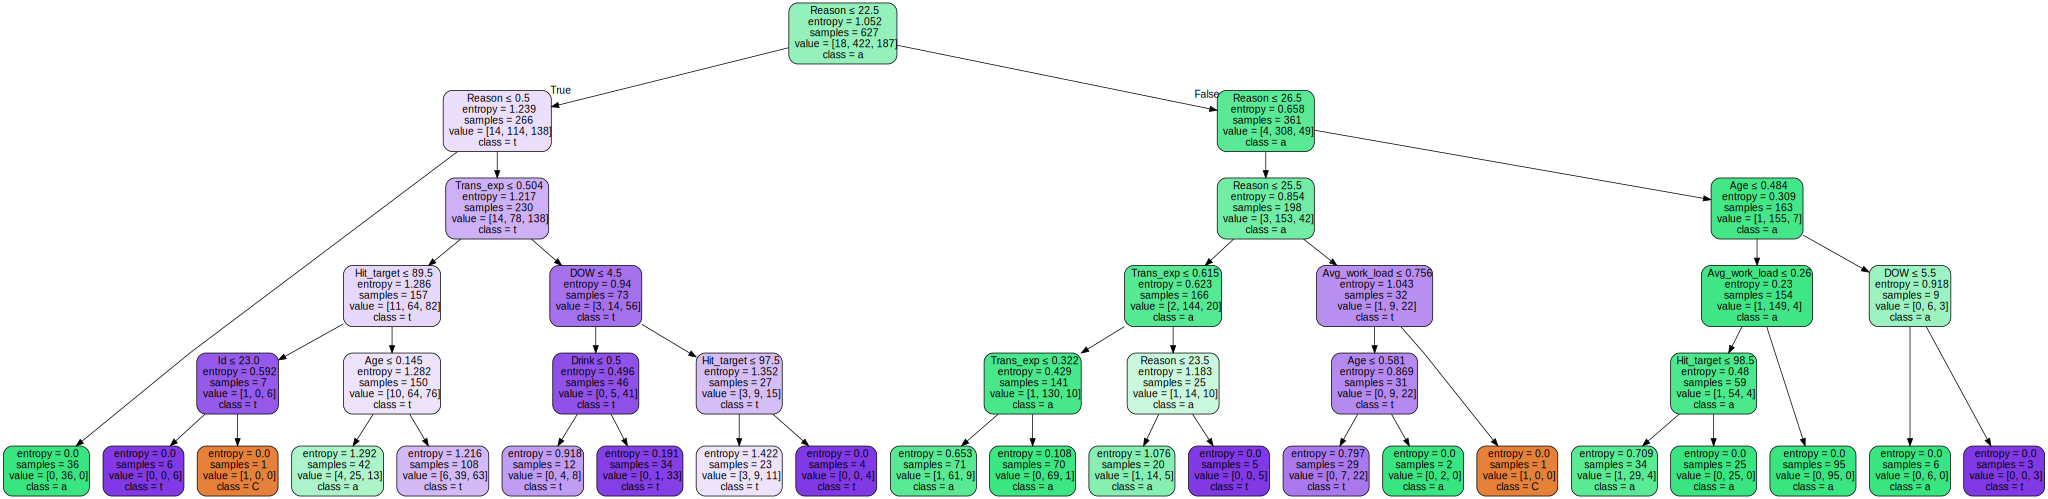

In [72]:
Source.from_file('ptdot')